<a href="https://colab.research.google.com/github/alexuqt/neural-networks/blob/main/2_TensorFlow_Chinese_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/CTTC"

1-TensorFlow-MNIST.ipynb	3-TensorFlow-Chinese-ANN.ipynb
2-TensorFlow-Chinese-CNN.ipynb	archive


In [ ]:
nRowsRead = 3000 # specify 'None' if want to read whole file
# chinese_mnist_df.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/My Drive/CTTC/archive/chinese_mnist.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'chinese_mnist_df.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3000 rows and 5 columns


In [ ]:
df1.head(5)

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [ ]:
# csv = pd.read_csv('/content/drive/My Drive/CTTC/archive/chinese_mnist.csv')
csv = pd.read_csv('/content/drive/My Drive/CTTC/archive/chinese_mnist.csv', delimiter=',', nrows = nRowsRead)
filename = csv[['suite_id', 'sample_id', 'code']].values

images = [ cv2.imread(f"/content/drive/My Drive/CTTC/archive/data/data/input_{suite_id}_{sample_id}_{code}.jpg") for suite_id, sample_id, code in filename ]
labels = [ [x - 1] for x in csv['code'].values ] # need to compensate to 0-15

In [ ]:
from sklearn.model_selection import train_test_split
images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels)

In [ ]:
OUT_LAYERS = 15

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(OUT_LAYERS))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                        

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=9,
                    validation_data=(test_images, test_labels))

Epoch 1/9
71/71 [==============================] - 34s 442ms/step - loss: 0.3321 - accuracy: 0.9236 - val_loss: 0.3335 - val_accuracy: 0.8960
Epoch 2/9
71/71 [==============================] - 31s 437ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0317 - val_accuracy: 0.9987
Epoch 3/9
71/71 [==============================] - 33s 465ms/step - loss: 0.0079 - accuracy: 0.9982 - val_loss: 0.0096 - val_accuracy: 0.9987
Epoch 4/9
71/71 [==============================] - 30s 423ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0119 - val_accuracy: 0.9960
Epoch 5/9
71/71 [==============================] - 31s 434ms/step - loss: 0.0091 - accuracy: 0.9978 - val_loss: 0.0110 - val_accuracy: 0.9960
Epoch 6/9
71/71 [==============================] - 30s 422ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0164 - val_accuracy: 0.9947
Epoch 7/9
71/71 [==============================] - 31s 437ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9973
Epoch 

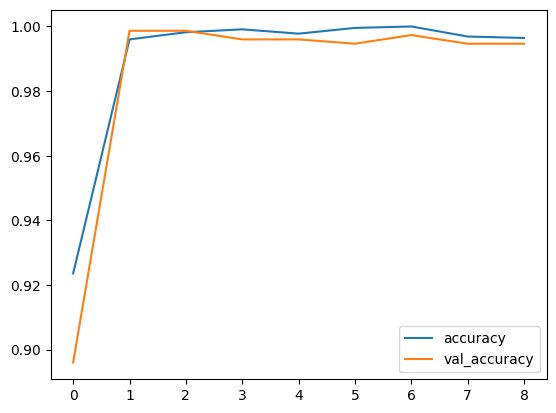

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

24/24 [==============================] - 3s 146ms/step - loss: 0.0137 - accuracy: 0.9947


In [ ]:
test_acc

0.9946666955947876

In [ ]:
model.save("chinese_cnn")